In [1]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace


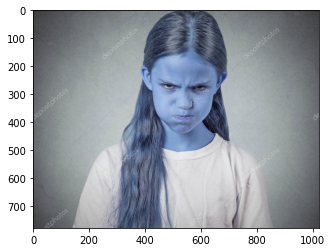

In [2]:
img = cv2.imread('angry-girl.jpg')
plt.imshow(img)

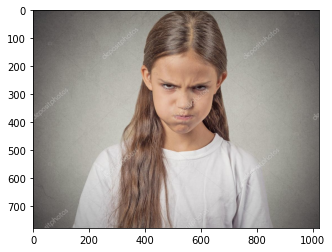

In [3]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [4]:
predictions = DeepFace.analyze(img,actions=['emotion'])

In [5]:
predictions

{'emotion': {'angry': 99.94319080629239,
  'disgust': 6.846892034268674e-11,
  'fear': 0.0008659459249440846,
  'happy': 0.00011817675430362537,
  'sad': 0.05531340216297235,
  'surprise': 7.219980497063519e-06,
  'neutral': 0.0005059661965042335},
 'dominant_emotion': 'angry',
 'region': {'x': 399, 'y': 172, 'w': 279, 'h': 279}}

In [6]:
predictions['dominant_emotion']

'angry'

In [7]:
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
cascade

<CascadeClassifier 00000276C7CC19D0>

In [9]:
gray_scaled_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [10]:
gray_scaled_img

array([[63, 62, 61, ..., 67, 63, 60],
       [61, 61, 61, ..., 62, 61, 62],
       [58, 59, 61, ..., 57, 58, 60],
       ...,
       [65, 66, 68, ..., 66, 66, 67],
       [66, 72, 72, ..., 68, 69, 69],
       [65, 71, 72, ..., 67, 67, 66]], dtype=uint8)

In [11]:
faces = cascade.detectMultiScale(gray_scaled_img,1.1,4)

In [12]:
faces

array([[399, 172, 279, 279]], dtype=int32)

In [13]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

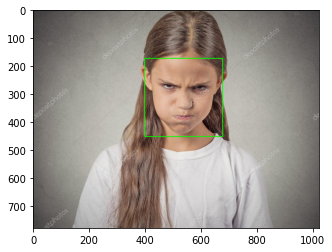

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Webcam cannot be opened")
while True:
    _,frame = cap.read()
    result = DeepFace.analyze(frame,actions=['emotion'])
    gray_scaled_i = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    face_cord = cascade.detectMultiScale(gray_scaled_i)
    for(x,y,w,h) in face_cord:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame,result['dominant_emotion'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()